## Exploratory Data Analysis - Wine Quality Dataset

- This project explores the Wine Quality dataset from the UCI Machine Learning Repository, which contains physicochemical properties of red wine samples and their corresponding quality scores. The objective of this analysis is to perform an Exploratory Data Analysis (EDA) to understand the distribution of the variables, identify patterns, detect outliers, and analyze relationships between chemical attributes and wine quality.

- Through data visualization and statistical summaries, the project aims to uncover which factors are most strongly associated with wine quality and to provide insights that can support further predictive modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Display basic information about the DataFrame
df.info()

# We can see that there are no missing values in the dataset
# The dataset has 1599 entries and 12 columns
# The data types of all columns are numeric (float64 and int64)

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# Show statistical summary of the DataFrame
df.describe()

# The dataset contains various physicochemical properties of red wine samples along with their quality ratings.
# The quality ratings range from 3 to 8, with most wines rated between 5 and 7.
# Free sulfur dioxide and total sulfur dioxide have a wide range of values (high std), indicating variability.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.shape

(1599, 12)

In [5]:
# Missing values in each column -  confirm that there are no missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check for duplicate rows - the dataset has 240 duplicated rows
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape

(1359, 12)

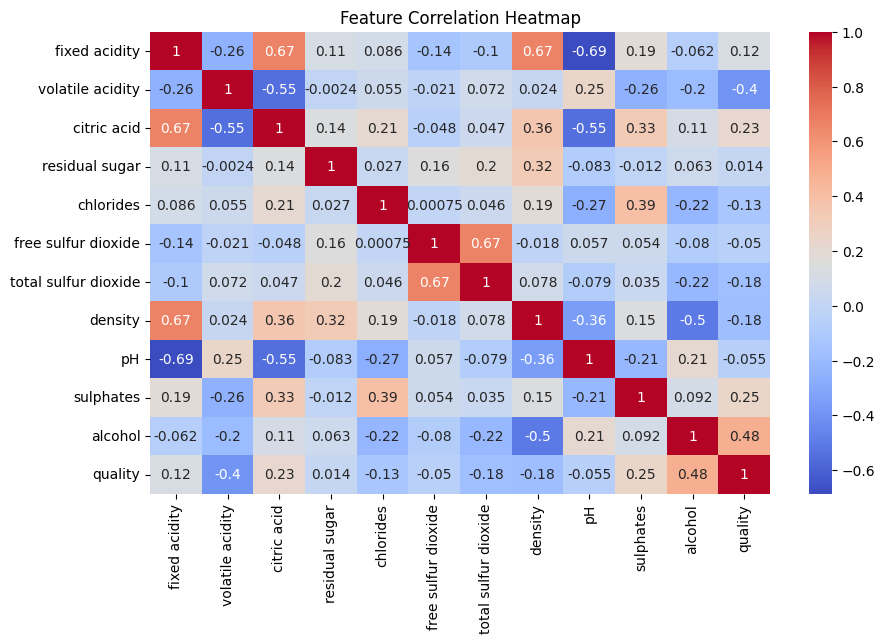

In [8]:
# Check correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()  

# We can see that 'alcohol' have a positive correlation with 'quality', indicating that higher alcohol content tends to be associated with better quality ratings.
# 'Sulphates' and 'citric acid' also shows a positive correlation with 'quality', but less than 'alcohol'.
# 'volatile acidity' has a negative correlation with 'quality', suggesting that higher levels of volatile acidity are linked to lower quality ratings.
# 'density', 'total sulfur dioxide' and 'chlorides' also shows a negative correlation with 'quality', but less than 'volatile acidity'.

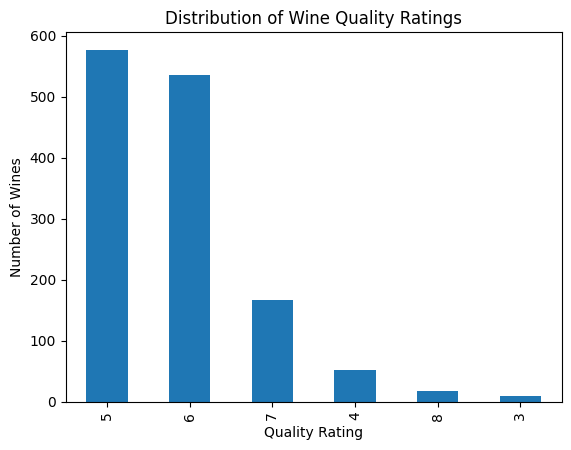

In [9]:
# Distribution of quality ratings
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Quality Rating')
plt.ylabel('Number of Wines')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# We can conlclude that the dataset is imbalanced.
# Concentration on wines rated 5 and 6 - few wines of exceptional quality

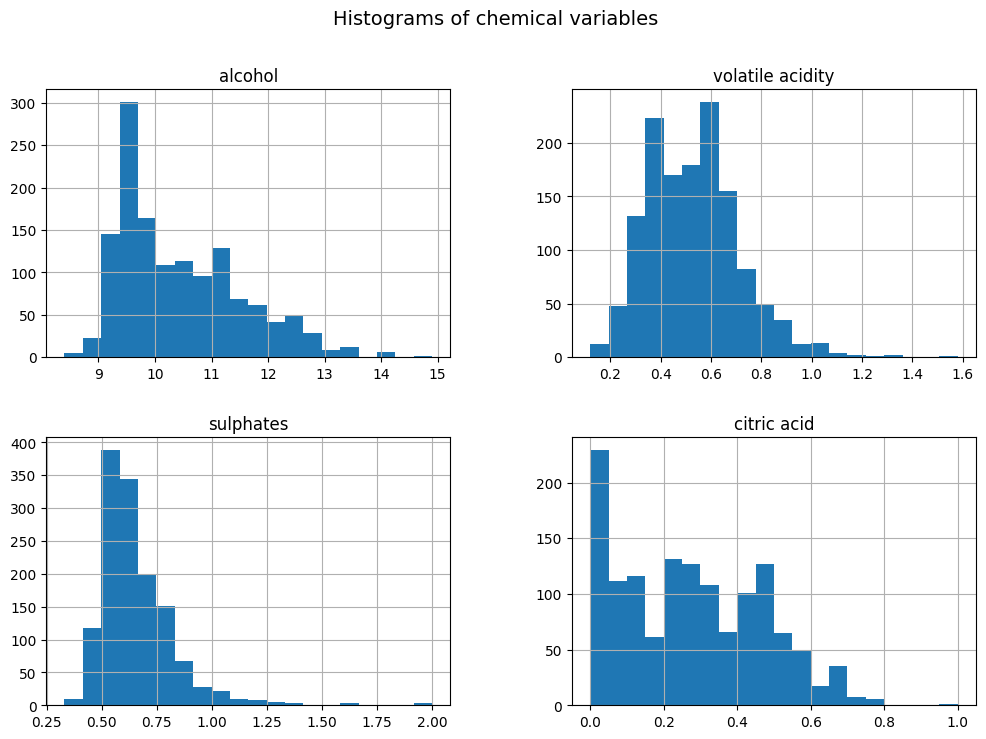

In [10]:
# Histograms of selected chemical variables
cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

df[cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Histograms of chemical variables', fontsize=14)
plt.show()

# From the histograms, we can observe the following:
# Alcohol content is right-skewed, with most wines having alcohol content between 10-12%.
# Volatile acidity is also right-skewed, with most wines having low levels of volatile acidity.
# Sulphates show a right-skewed distribution, with most wines having sulphate levels between 0.4-0.8 g/dm3.
# Citric acid has a right-skewed distribution, with most wines having low levels of citric acid.   

# The chemical variables analyzed exhibit distributions with asymmetry and the presence of outliers, especially for sulfates and alcohol. 
# These characteristics indicate the need for caution in statistical analyses and possible transformations before modeling.

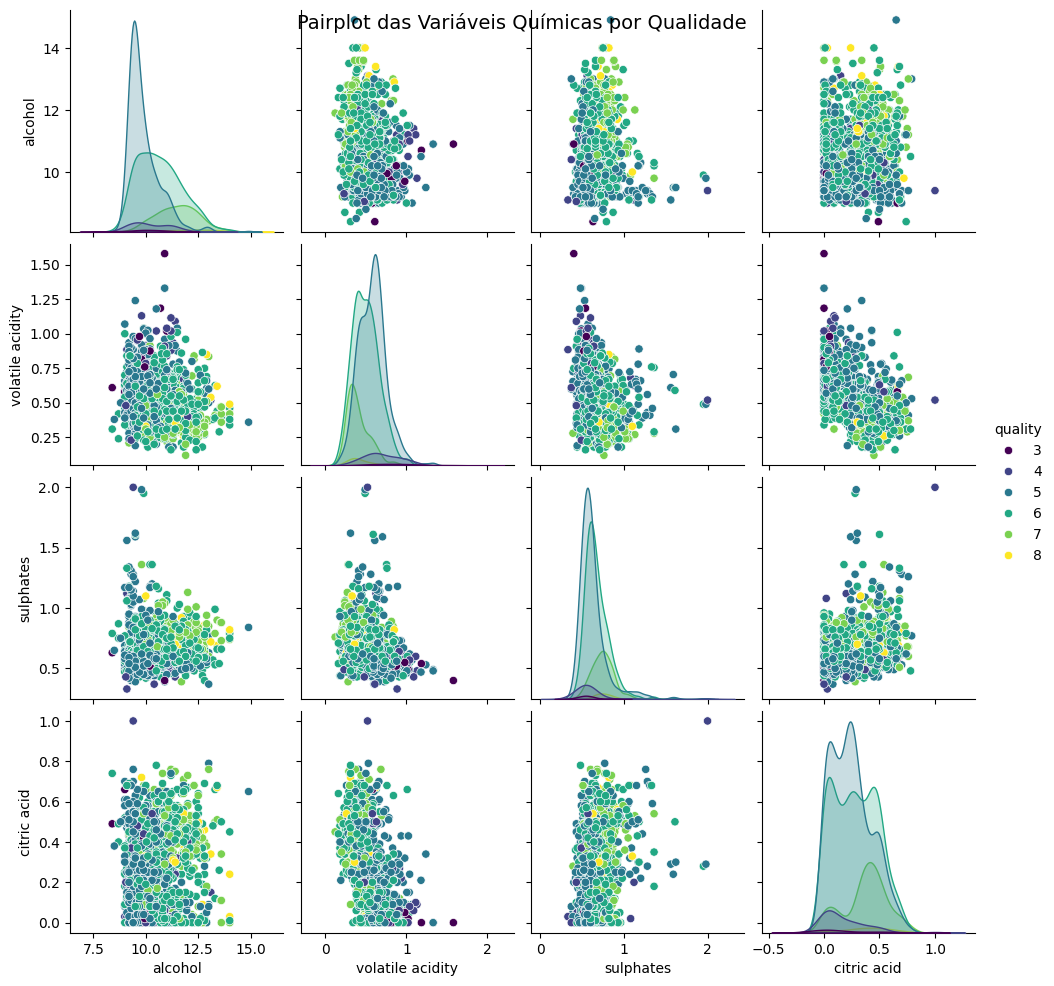

In [ ]:
# Pairplot of selected chemical variables
sns.pairplot(df, vars=cols, hue='quality', palette='viridis')
plt.suptitle('Pairplot of Chemical Variables by Quality', fontsize=14)
plt.show()  

# From the pairplot, we can observe the following:
# There are some visible relationships between certain chemical variables and wine quality.
# Higher alcohol content tends to be associated with higher quality ratings.
# Lower volatile acidity is generally linked to better quality wines.
# Higher sulphate levels also appear to correlate with higher quality ratings.
# Citric acid does not show a strong relationship with quality in the pairplot.


# Conlcusion:
# Higher quality wines tend to have higher alcohol content and lower volatile acidity. 
# Overlap between classes is observed, indicating that quality is not determined by a single variable, but by a combination of chemical characteristics.

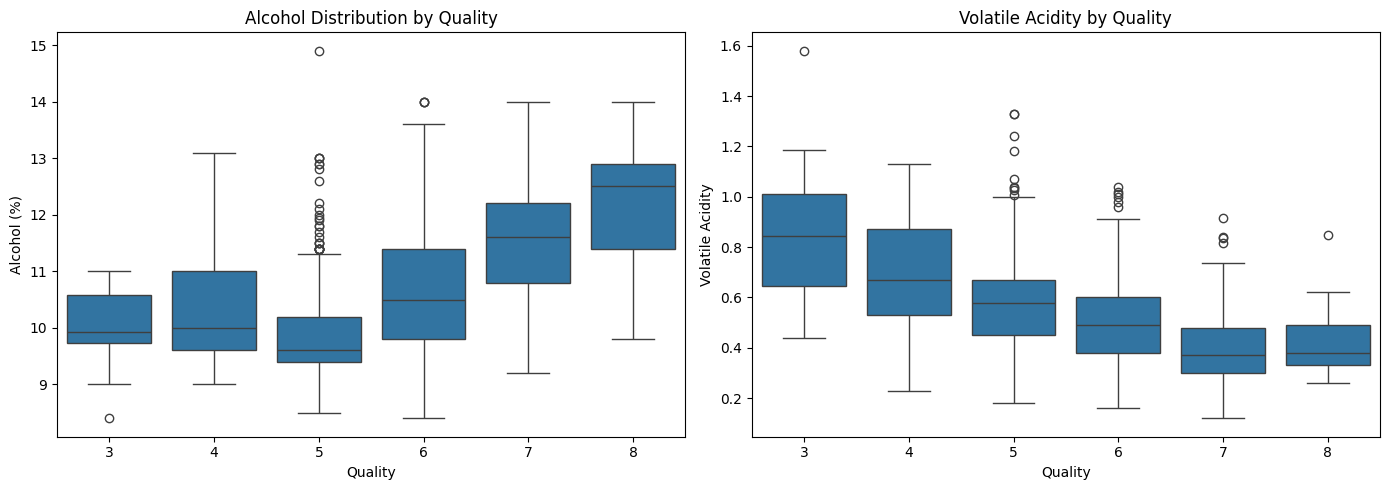

In [ ]:
# Boxplots of Alcohol and Volatile Acidity by Quality

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Alcohol by Quality Boxplot
sns.boxplot(x='quality', y='alcohol', data=df, ax=axes[0])
axes[0].set_title('Alcohol Distribution by Quality')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Alcohol (%)')

# Volatile Acidity by Quality Boxplot
sns.boxplot(x='quality', y='volatile acidity', data=df, ax=axes[1])
axes[1].set_title('Volatile Acidity by Quality')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Volatile Acidity')

plt.tight_layout()
plt.show()

# Higher quality wines tend to have higher alcohol content, with median alcohol levels increasing with quality ratings.
# There is also greater variability (many outliers) in alcohol content for mid-quality wines (ratings 5 and 6).
# Lower quality wines tend to have higher volatile acidity, with median levels decreasing as quality ratings increase.
# Higher quality wines exhibit lower variability in volatile acidity, indicating more consistent acidity levels.

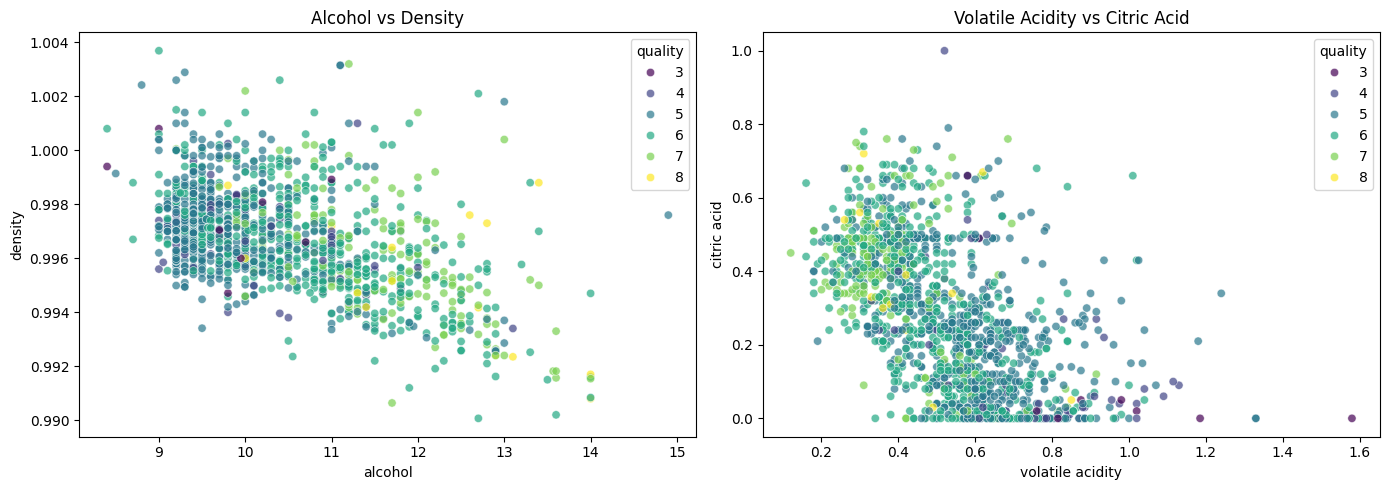

In [ ]:
# Scatter plots of selected chemical variables

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Alcohol vs Density
sns.scatterplot(x='alcohol', y='density', hue='quality', data=df, palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('Alcohol vs Density')
axes[0].set_xlabel('alcohol')
axes[0].set_ylabel('density')

# Volatile Acidity vs Citric Acid
sns.scatterplot(x='volatile acidity', y='citric acid', hue='quality', data=df, palette='viridis', alpha=0.7, ax=axes[1])
axes[1].set_title('Volatile Acidity vs Citric Acid')
axes[1].set_xlabel('volatile acidity')
axes[1].set_ylabel('citric acid')

plt.tight_layout()
plt.show()

# We can observe the following from the scatter plots:
# There is a negative correlation between alcohol content and density. 
# Higher quality wines tend to have higher alcohol content and lower density.
# There is a slight negative correlation between volatile acidity and citric acid. 
# Higher quality wines generally have lower volatile acidity and higher citric acid levels.